In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")

In [3]:
transactions = pd.read_csv("Transactions.csv")

In [4]:
data = pd.merge(transactions, customers, on="CustomerID", how="left")

In [5]:
features = data.groupby("CustomerID").agg(
    total_spent=("TotalValue", "sum"),
    purchase_count=("TransactionID", "count"),
    product_variety=("ProductID", pd.Series.nunique),
    signup_year=("SignupDate", lambda x: pd.to_datetime(x).dt.year.iloc[0])
).reset_index()

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.drop("CustomerID", axis=1))

In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [8]:
features["Cluster"] = clusters

In [9]:
db_index = davies_bouldin_score(scaled_features, clusters)
silhouette = silhouette_score(scaled_features, clusters)

In [10]:
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette}")

Davies-Bouldin Index: 0.9712149449468066
Silhouette Score: 0.3486519542227423


In [11]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

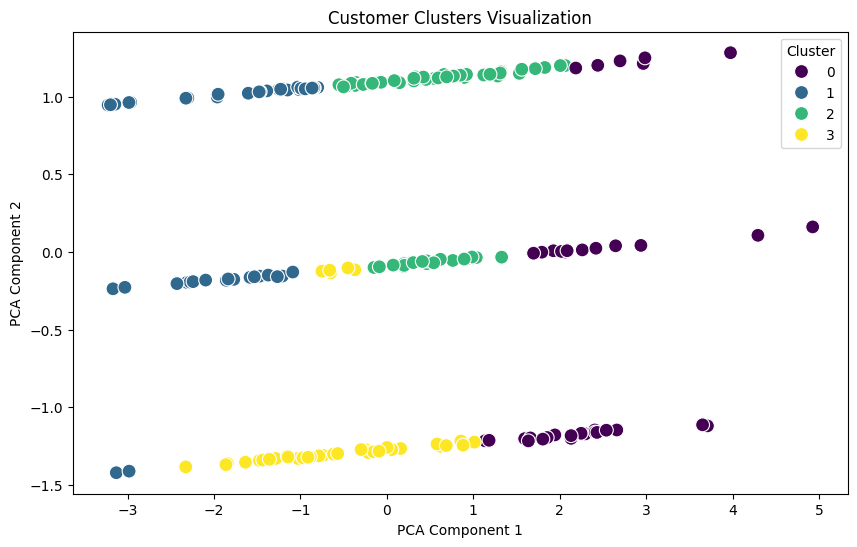

In [15]:
# Ensure the backend is set for Jupyter
%matplotlib inline

# Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=reduced_data[:, 0],
    y=reduced_data[:, 1],
    hue=features["Cluster"],
    palette="viridis",
    s=100
)
plt.title("Customer Clusters Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


In [14]:
features.to_csv("CustomerClusters.csv", index=False)